# Setup #

In [ ]:
import pandas as pd
#!pip install pandasql
import pandasql as ps
import numpy as np
from plotnine import *

# Get the Data #

In [18]:
url = ['https://raw.githubusercontent.com/BigTimeStats/beach-volleyball/master/data/full_archive/full_archive.csv']       

df = pd.read_csv(url[0], index_col=None, header=0, encoding = "latin-1")

df.head(5)

,circuit,tournament,country,year,date,gender,match_num,w_player1,w_p1_birthdate,w_p1_age,...,l_p1_tot_blocks,l_p1_tot_digs,l_p2_tot_attacks,l_p2_tot_kills,l_p2_tot_errors,l_p2_tot_hitpct,l_p2_tot_aces,l_p2_tot_serve_errors,l_p2_tot_blocks,l_p2_tot_digs
0,AVP,Huntington Beach,United States,2002,2002-05-24,M,1,Kevin Wong,1972-09-12,29.694730,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN
1,AVP,Huntington Beach,United States,2002,2002-05-24,M,2,Brad Torsone,1975-01-14,27.356605,...,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,AVP,Huntington Beach,United States,2002,2002-05-24,M,3,Eduardo Bacil,1971-03-11,31.203285,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,AVP,Huntington Beach,United States,2002,2002-05-24,M,4,Brent Doble,1970-01-03,32.386037,...,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN
4,AVP,Huntington Beach,United States,2002,2002-05-24,M,5,Albert Hannemann,1970-05-04,32.054757,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81232 entries, 0 to 81231
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   circuit                81232 non-null  object 
 1   tournament             81232 non-null  object 
 2   country                81232 non-null  object 
 3   year                   81232 non-null  int64  
 4   date                   81232 non-null  object 
 5   gender                 81232 non-null  object 
 6   match_num              81232 non-null  int64  
 7   w_player1              81232 non-null  object 
 8   w_p1_birthdate         80779 non-null  object 
 9   w_p1_age               80779 non-null  float64
 10  w_p1_hgt               76423 non-null  float64
 11  w_p1_country           81220 non-null  object 
 12  w_player2              81232 non-null  object 
 13  w_p2_birthdate         80759 non-null  object 
 14  w_p2_age               80759 non-null  float64
 15  w_

# Data Preparation #

## Formatting ##

### Duration Format Change ###

In [51]:
df_new = df[df['duration'].notnull()]

In [53]:
def get_seconds(time_str):
    hh, mm = time_str.split(':')
    return int(hh) * 3600 + int(mm) * 60 

print('Time in Seconds:', get_seconds(df_new['duration'][0]))

Time in Seconds: 1980


In [42]:
df_clean = df_new.copy()
df_clean['duration_in_seconds'] = df_clean['duration'].apply(get_seconds)

In [43]:
df_clean

,circuit,tournament,country,year,date,gender,match_num,w_player1,w_p1_birthdate,w_p1_age,...,l_p1_tot_digs,l_p2_tot_attacks,l_p2_tot_kills,l_p2_tot_errors,l_p2_tot_hitpct,l_p2_tot_aces,l_p2_tot_serve_errors,l_p2_tot_blocks,l_p2_tot_digs,duration_in_seconds
0,AVP,Huntington Beach,United States,2002,2002-05-24,M,1,Kevin Wong,1972-09-12,29.694730,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,1980
1,AVP,Huntington Beach,United States,2002,2002-05-24,M,2,Brad Torsone,1975-01-14,27.356605,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3420
2,AVP,Huntington Beach,United States,2002,2002-05-24,M,3,Eduardo Bacil,1971-03-11,31.203285,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,2760
3,AVP,Huntington Beach,United States,2002,2002-05-24,M,4,Brent Doble,1970-01-03,32.386037,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN,2640
4,AVP,Huntington Beach,United States,2002,2002-05-24,M,5,Albert Hannemann,1970-05-04,32.054757,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81227,FIVB,Itapema,Brazil,2021,2021-11-10,W,52,Hegeile Almeida,1995-10-30,26.031485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3120
81228,FIVB,Itapema,Brazil,2021,2021-11-10,W,53,Agatha Bednarczuk,1983-06-22,38.387406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2280
81229,FIVB,Itapema,Brazil,2021,2021-11-10,W,54,Hegeile Almeida,1995-10-30,26.031485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2460
81230,FIVB,Itapema,Brazil,2021,2021-11-10,W,55,Sara Hughes,1995-02-14,26.737851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700


# Data Visualisation #

## Game Duration over Time

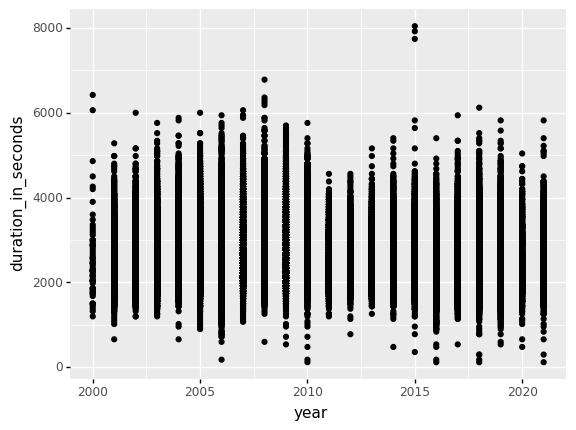

<ggplot: (8767758004812)>

In [40]:
ggplot(df_clean, aes(x='year', y='duration_in_seconds')) + geom_point()

/Users/lucajoos/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 968 rows containing missing values.


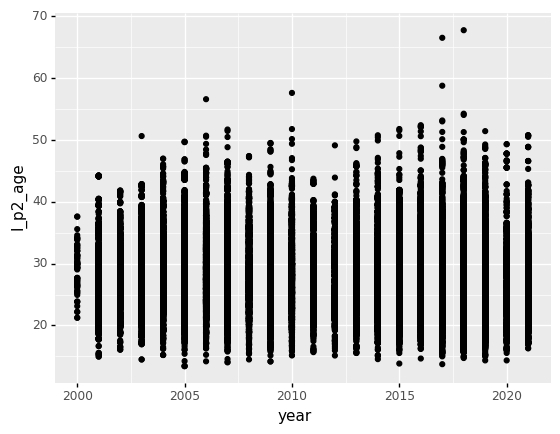

<ggplot: (8767648646979)>

In [63]:
ggplot(df_clean, aes(x='year', y='l_p2_age')) + geom_point()

In [25]:
df_clean.loc[df_clean['w_player1'] == 'Kevin Wong']

,circuit,tournament,country,year,date,gender,match_num,w_player1,w_p1_birthdate,w_p1_age,...,l_p1_tot_digs,l_p2_tot_attacks,l_p2_tot_kills,l_p2_tot_errors,l_p2_tot_hitpct,l_p2_tot_aces,l_p2_tot_serve_errors,l_p2_tot_blocks,l_p2_tot_digs,duration_in_seconds
0,AVP,Huntington Beach,United States,2002,2002-05-24,M,1,Kevin Wong,1972-09-12,29.694730,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,1980
16,AVP,Huntington Beach,United States,2002,2002-05-24,M,17,Kevin Wong,1972-09-12,29.694730,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,2340
24,AVP,Huntington Beach,United States,2002,2002-05-24,M,25,Kevin Wong,1972-09-12,29.694730,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,3900
57,AVP,Huntington Beach,United States,2002,2002-05-24,M,58,Kevin Wong,1972-09-12,29.694730,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,3120
106,AVP,Hermosa Beach,United States,2002,2002-06-07,M,1,Kevin Wong,1972-09-12,29.733059,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,2040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35804,FIVB,Klagenfurt,Austria,2006,2006-08-02,M,52,Kevin Wong,1972-09-12,33.886379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2820
35842,FIVB,Klagenfurt,Austria,2006,2006-08-02,M,28,Kevin Wong,1972-09-12,33.886379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2580
35864,FIVB,Klagenfurt,Austria,2006,2006-08-02,M,56,Kevin Wong,1972-09-12,33.886379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4320
36194,FIVB,Acapulco,Mexico,2006,2006-10-24,M,31,Kevin Wong,1972-09-12,34.113621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2460


In [34]:
df_clean['l_p2_age'].max()

67.7645448

In [38]:
df_clean['l_player2'].loc[df_clean['l_p2_age'].idxmax()]

'Steven Cahn'

### Unique Circuits ###

In [49]:
print(pd.unique(df_clean['circuit']))

['AVP' 'FIVB']


### Unique Tournament Places ###

In [48]:
print(pd.unique(df_clean['tournament']))

['Huntington Beach' 'Hermosa Beach' 'Santa Barbara' 'Belmar'
 'Manhattan Beach' 'Chicago' 'Las Vegas' 'Fort Lauderdale' 'Tempe'
 'San Diego' 'Austin' 'Honolulu' 'Mason' 'Boulder' 'Sacramento'
 'Seaside Heights' 'Atlanta' 'Birmingham' 'Brooklyn' 'Lake Tahoe' 'Miami'
 'Dallas' 'Glendale' 'Louisville' 'Tampa' 'Charleston' 'Long Beach'
 'Boston' 'San Francisco' 'Panama City' 'Riverside' 'Houston' 'Ocean City'
 'Muskegon' 'Virginia Beach' 'Salt Lake City' 'Cincinnati' 'Atlantic City'
 'St. Petersburg' 'Milwaukee' 'New Orleans' 'New York' 'Seattle' 'Sydney'
 'Macau' 'Cagliari' 'Tenerife' 'Gstaad' 'Berlin' 'Stavanger'
 'Gran Canaria' 'Lignano' 'Marseille' 'Espinho' 'Klagenfurt' 'Osaka'
 'Ostende' 'Maoming' 'Hong Kong' 'Brisbane' 'Mallorca' 'Fortaleza'
 'Madrid' 'Rhodes' 'Cadiz' 'Lianyungang' 'Bali' 'Milan' 'Carson'
 'Rio de Janeiro' 'Salvador' 'Cape Town' 'Budva' 'Shanghai'
 'Carolina Beach' 'Stare Jablonki' 'Athens' 'Zagreb' 'Paris' 'Acapulco'
 'Modena' 'Roseto degli Abruzzi' 'Warsaw' 'Porto

# Marketing in Beachvolley

# Beachvolley Onthology
